In [1]:
import numpy as np
import pandas as pd # Load the Pandas libraries with alias 'pd'
import os
from perceptron import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn


In [2]:
file_name = '/mnist_train.csv'
#file_name = '/mnist_validation.csv'
total_epoch = 50 #would have to be set to 50
learning_rate = 0.1

In [3]:
data = np.genfromtxt(os.getcwd() + file_name, delimiter=',')

In [4]:
lable = data[:,:1]
input_data = data/225
input_data[:,:1] = 1 #bias unit set to 1
data_size = len(data)
accuracy = []

In [5]:
model = []
for i in range(10):
    model.append(Perceptron())

In [6]:
for perceptron in model:
    perceptron.print_weights()

045 -0.01304503  0.01282285  0.04028265
 -0.04992472 -0.02007758 -0.0432155   0.03347712 -0.00705988  0.00904947
 -0.03873371  0.03721465  0.01181497 -0.02890946 -0.01232803 -0.04101589
  0.00110145  0.04986562  0.01077099 -0.0433231  -0.02842069  0.03601839
  0.03518052  0.01148338  0.0192225   0.01278324  0.00565283 -0.04298545
 -0.01969844  0.02650368  0.01748599  0.00704322 -0.00437151 -0.028734
 -0.00094746  0.02788592  0.0145238   0.00208632 -0.01436136  0.00302763
 -0.009086   -0.03979823  0.01130403  0.04295187 -0.02985306  0.0261025
 -0.01952498  0.03985196 -0.04315672  0.04367214 -0.02171385 -0.0348621
  0.00158053  0.04297021 -0.03258692  0.0293231  -0.01631903  0.01178655
 -0.04246846  0.04101088  0.01683013 -0.03048534  0.03724482 -0.03254569
 -0.01199117  0.04916559 -0.00815008 -0.03186976 -0.0101733   0.02498257
 -0.02095137  0.02519122  0.00689856  0.04587207 -0.04321379  0.04774228
 -0.03274832 -0.0241281   0.02766804  0.0279546   0.0081904  -0.04116284
 -0.02455044  0

0.8909
      0     1     2     3     4     5     6     7     8     9
0  5769     1    16    25     1    25    31     9    42     4
1     1  6146   110    18    12    35     8    44   349    19
2    99    12  4978    96    25    45   156   125   405    17
3    50     9   164  5354     3   147    31    86   223    64
4    56     8    37    18  4980    45   176    62   203   257
5    81    10    31   308    31  4509    89    25   247    90
6    53    13    35     7    12    88  5630     3    77     0
7    21     2    35    17    35    13     8  5918    57   159
8    51    45    79   158    13   153    42    23  5217    70
9    42    10    25   106   127    54     5   461   166  4953


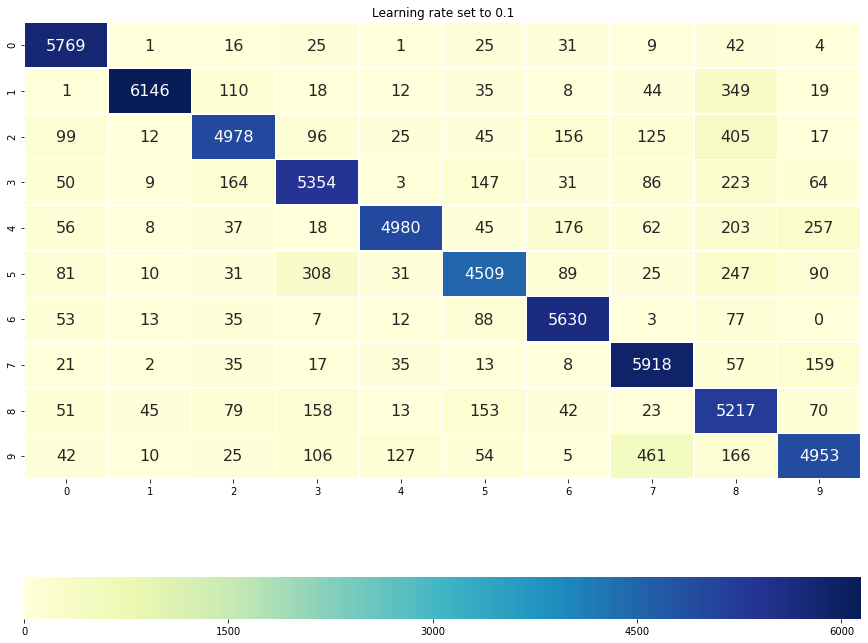

In [19]:
def cal_accuracy(model, input_data, accuracy):
    hit = 0
    p = []
    for i in range(len(input_data)):
        for j in range(10):
            dot_result = model[j].dot(input_data[i])
            if j == 0:
                prediction = 0
                record = dot_result
            if record < dot_result:
                record = dot_result
                prediction = j
        p.append(prediction)
        if prediction == lable[i]:
            hit += 1
    accuracy.append(hit/len(input_data)*100)
    print(hit/len(input_data))
    cm = confusion_matrix(lable, p)
    df_cm = pd.DataFrame(cm, range(10), range(10))
    print(df_cm)
    plt.figure(figsize = (15,12))
    sn.heatmap(df_cm, 
                annot=True, 
                cmap="YlGnBu", 
                annot_kws={"size": 16},
                cbar_kws={"orientation": "horizontal"},
                fmt='g',
                linewidths=.5)
    #https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("Learning rate set to 0.1")
    plt.savefig("test-cm")
    plt.show() # ta-da!

cal_accuracy(model, input_data, accuracy)


0.10603333333333333
      0     1  2   3    4     5     6    7    8    9
0  4126   568  0   1    7   769   360   14   67   11
1  1073  1286  0  28  398  1632  2256   26    4   39
2  2251   862  0  14   70  1525   879   97  208   52
3  2035  1059  0   3  167  1071  1571    4   42  179
4  1515  2567  0   6  117   457   498  413   78  191
5  1848  2153  0  12   18   373   768  125   45   79
6  3924   706  0   1   91   409   330  255   12  190
7   676  3463  0  39    9  1600   120    8    1  349
8  1364  2770  0   4   79   324  1181   23   27   79
9  1904  3253  0  13  148   260   273    5    1   92


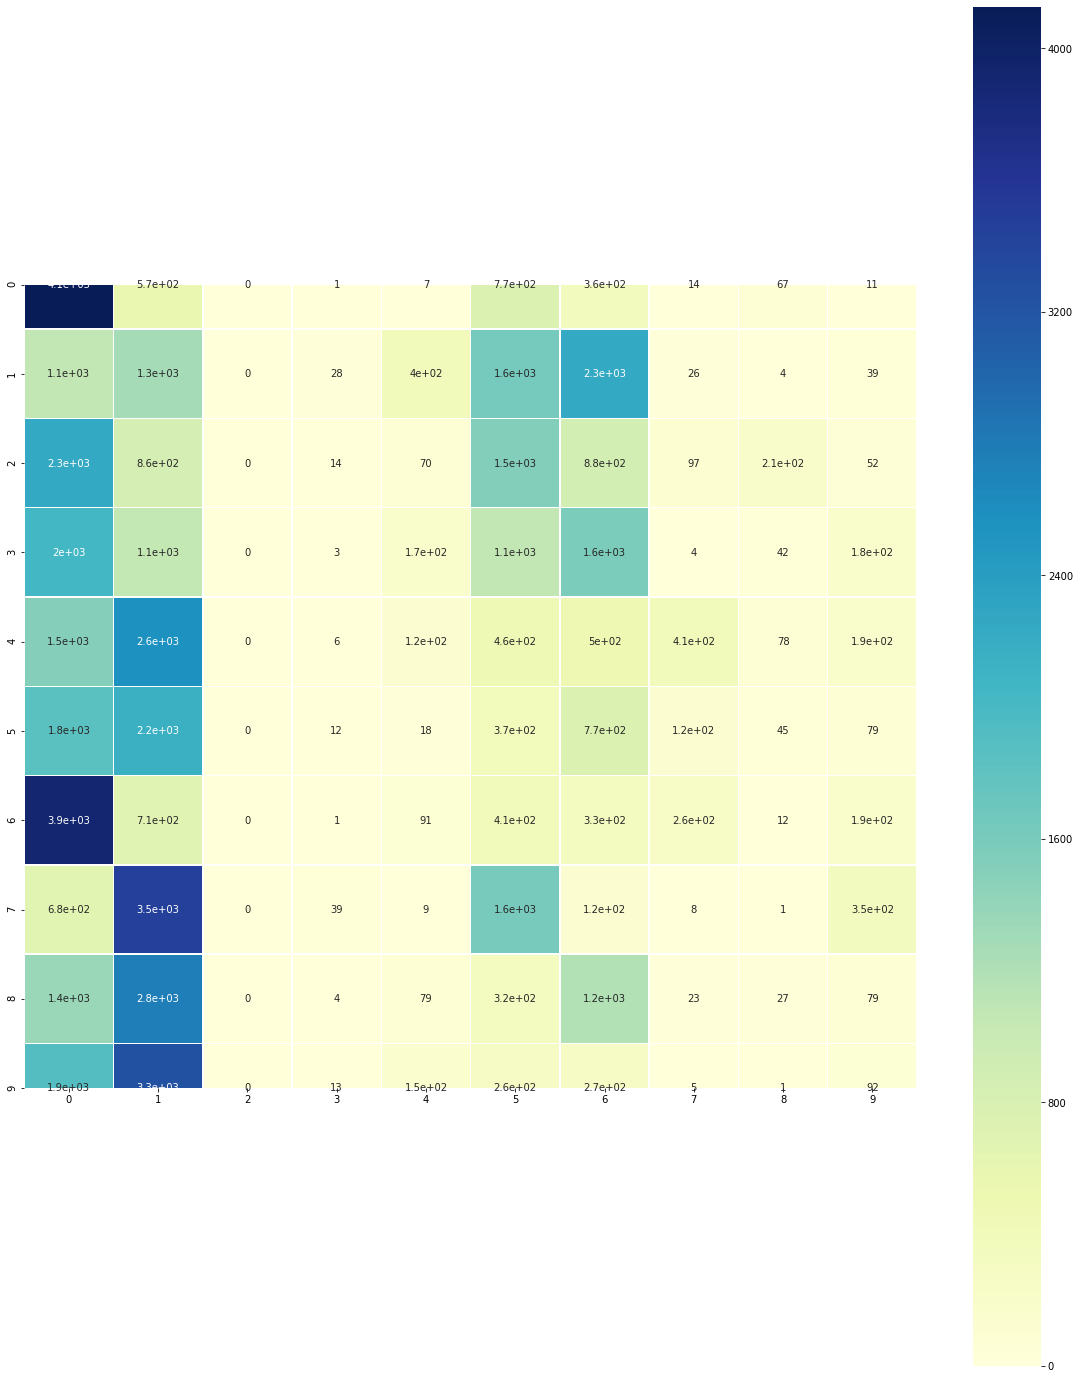

In [7]:
cal_accuracy(model, input_data, accuracy)

In [8]:

for epoch in range(total_epoch):
    for i in range(data_size):
        for j in range(10):
            if lable[i] == j:
                target = 1
            else:
                target = 0
            model[j].train(target, model[j].dot(input_data[i]), input_data[i], learning_rate)
    #cal_accuracy(model, input_data, accuracy)

        

KeyboardInterrupt: 

In [ ]:
cal_accuracy(model, input_data, accuracy)

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%) ')
plt.plot(accuracy)
plt.show()

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%) ')
plt.plot(accuracy[1:])
plt.show()

In [ ]:
cal_accuracy(model, input_data, accuracy)

In [ ]:
learning_rates = [0.00001, 0.001, 0.1]
def save_file_name_switch(learning_rate): 
    switcher = { 
        0.00001: "plot_l_r_00001", 
        0.001: "plot_l_r_001", 
        0.1: "plot_l_r_1", 
    } 
    return switcher.get(learning_rate, "nothing")
mylist = [1,2,3,4,5,6,7,8]
mylist_1 = [7,2,3,4,5,6,7,8]
for learning_rate in learning_rates:
    print(learning_rate)
    print (save_file_name_switch(learning_rate))
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%) ')
    plt.plot(mylist, label = "A")
    plt.plot(mylist_1, label = "B")
    plt.savefig(save_file_name_switch(learning_rate))
    plt.legend()
